In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
Uploaded = files.upload()
import io


Saving train.csv to train.csv


In [ ]:
Uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv(io.BytesIO(Uploaded['test.csv']))

In [ ]:
train = pd.read_csv(io.BytesIO(Uploaded['train.csv']))

In [ ]:
#so let us make an original copy of the loaded dataset
#this is to ensure even when we make changes to the original dataset, we would still have a backup
train_original = train.copy()
test_original = test.copy()

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
#to see number of rows in the train dataset(left), and the number of columns in the train dataset(right)
train.shape[0], train.shape[1]

(614, 13)

In [ ]:
#to see number of rows in the test dataset(left), and the number of columns in the test dataset(right)
test.shape[0], test.shape[1]

(367, 12)

In [ ]:
#now let us calculate train-test-split-ratio, here, we are focusing on the percentage of train in the entire dataset, and the test in the entire dataset
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6258919469928644, 0.37410805300713557)

In [ ]:
#Now let us check the columns in both train and test data
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [ ]:
#sum both train and test data together in terms of number of rows, then we have 981 records
train.shape[0] + test.shape[0]

981

In [ ]:
# Now let us see the data types for each columns of the dataset
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# It would be noticed that there are 614 records in the train dataset, and 367 records in the test dataset, making a total of 981 records in the whole dataset, making a train-test-split of about 63% and 37% aprroximately. The train data is somewhat similar to the test data except that the test data does not have the Loan status unlike the train data. So we would build a model from the train data to predict loan approval with the test data.

In [ ]:
#Now let us check the columns dtypes, the non null-values, and the memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# It can be seen from the info above that there are three data types in our data

1. Object: Which means these columns here have categorical values
2. int64: Which means the columns contain integers
3. float64: Which means the columns have decimal values as its content.

# Understanding the data types go a long way in us understanding how to deal with the respective columns to draw insights


# Univariate Analysis

Univariate analysis is when we analyze each variable individually for each column. For categorical variable, we use frequency plot, bar plot to understand value distribution in a particular column. Then for Numerical Variable, We use histogram, box-plot to understand the disribution of the data for the individual column.

# Target Variable

The target variable is a categorical variable, so we would take a close study of the Loan Status to have an understanding of the data distribution.

In [ ]:
#Frequency table would show us the count of each category in each variable, so let's do for Loan_Status
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
#percentage distribution of the category in the Loan_Status column
train['Loan_Status'].value_counts(normalize= True )

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

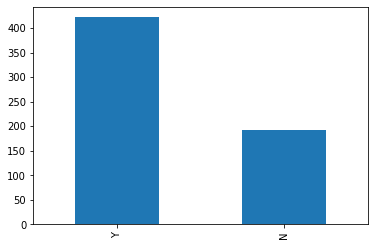

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

# Notable

This from the Loan_Status, we can see that 69% of the applications submitted were approved while about 31% was rejected.

# Independent Variable(Categorical) to be looked into now

They are: Gender, Married, Education, Self Employed, Credit History

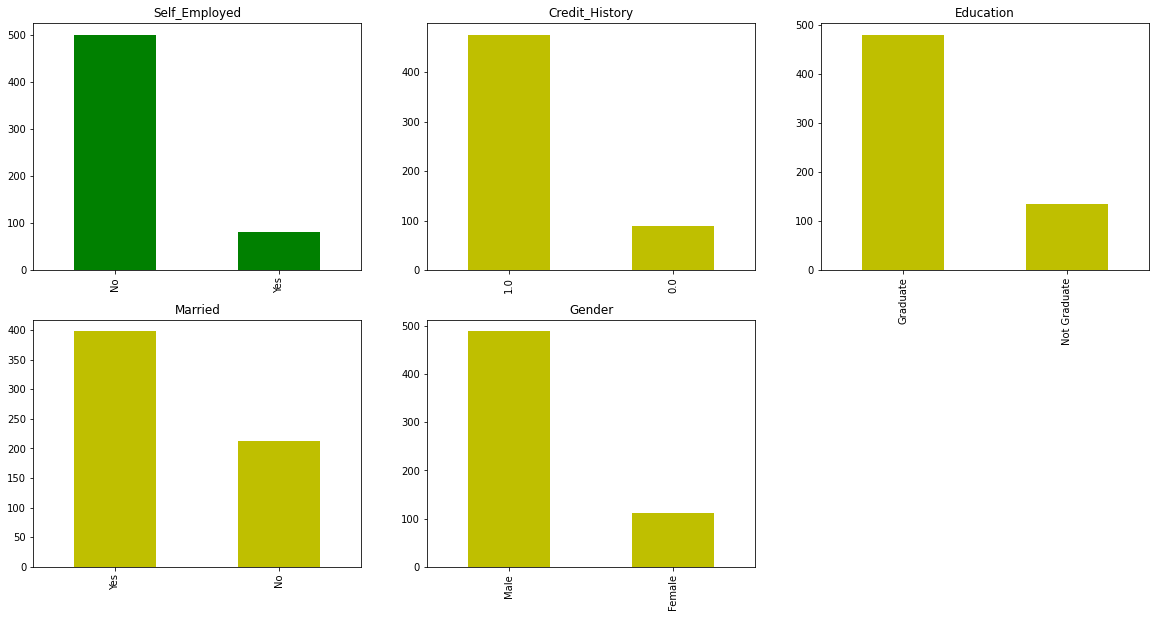

In [ ]:
plt.subplot(231)
train['Self_Employed'].value_counts().plot(kind='bar', color='g', title="Self_Employed", figsize=(20,10))

plt.subplot(232)
train['Credit_History'].value_counts().plot(kind='bar', color='y', title="Credit_History")

plt.subplot(233)
train['Education'].value_counts().plot(kind='bar', color='y', title="Education")

plt.subplot(234)
train['Married'].value_counts().plot(kind='bar', color='y', title="Married")

plt.subplot(235)
train['Gender'].value_counts().plot(kind='bar', color='y', title="Gender")

# Insights

It can be seen that from the train dataset, we have more male in the dataset than female, more married than single, more Graduates than non-Graduates, less self employed than self employed

# Now let us normalize the plot above

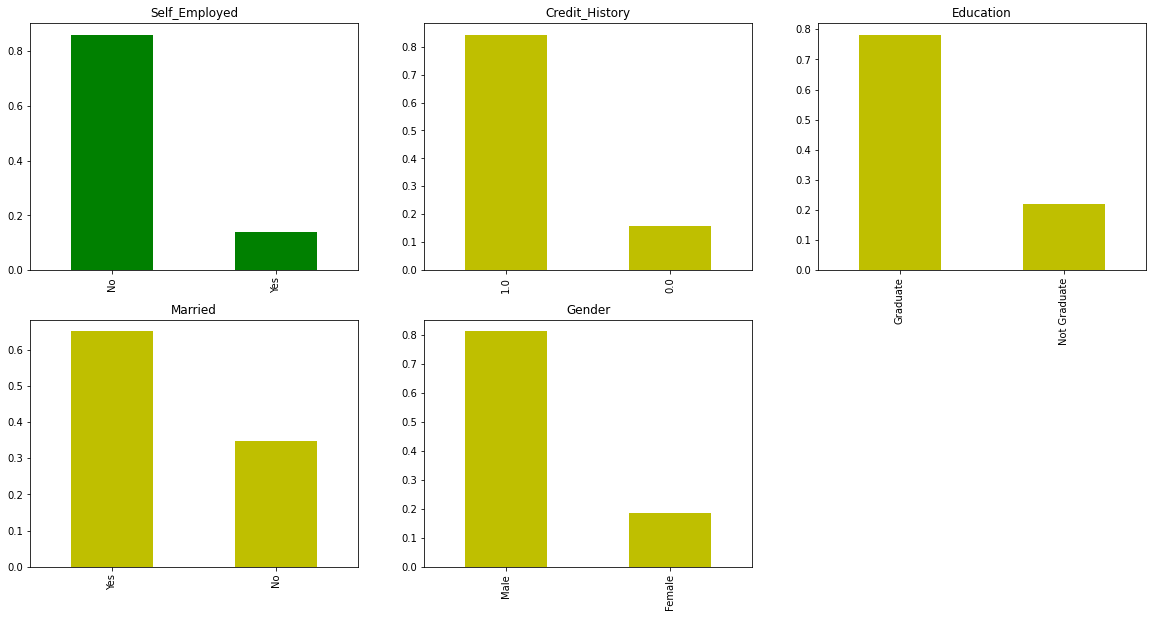

In [ ]:
plt.subplot(231)
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar', color='g', title="Self_Employed", figsize=(20,10))

plt.subplot(232)
train['Credit_History'].value_counts(normalize=True).plot(kind='bar', color='y', title="Credit_History")

plt.subplot(233)
train['Education'].value_counts(normalize=True).plot(kind='bar', color='y', title="Education")

plt.subplot(234)
train['Married'].value_counts(normalize=True).plot(kind='bar', color='y', title="Married")

plt.subplot(235)
train['Gender'].value_counts(normalize=True).plot(kind='bar', color='y', title="Gender")

# Independent Variable(Ordinal)

It is categorical, but just that it contains some order in it, so it ended up having up to three category in such columns

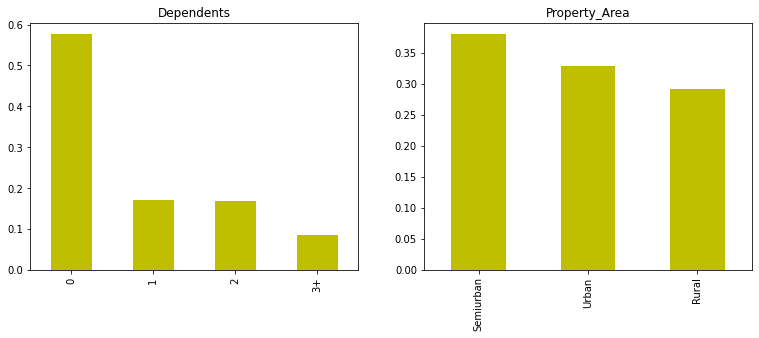

In [ ]:
plt.subplot(231)
train['Dependents'].value_counts(normalize=True).plot(kind='bar', figsize=(20,10), title='Dependents', color='y')


plt.subplot(232)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar', title='Property_Area', color='y')

# It can be seen from the above that

More than 50% of the applicants have no dependents, while most of the applicants are from semiurban area

# Independent Variable(Numerical)

Now, let us see the numerical columns, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term


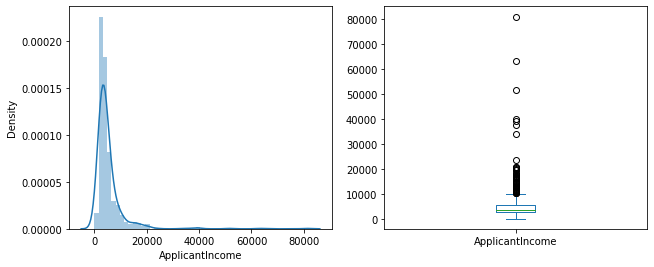

In [ ]:
#Now let us use dist-plot to see the skewness
plt.subplot(231)
sns.distplot(train['ApplicantIncome']);

plt.subplot(232)
train['ApplicantIncome'].plot(kind = 'box', figsize= (16, 9))


From the ApplicantIncome Analysis, it is evident  that more of the data are to the left making the data distribution to be right-skewed(having positive skewness). I would right try to make the distribution normal as algorithms work better if the data is distributed normally.

The boxplot confirms presence of outliers.This is due to people not earning equal amount by virtue of their education.

Now let us see groupings of their income by Education

Text(0.5, 0.98, '')

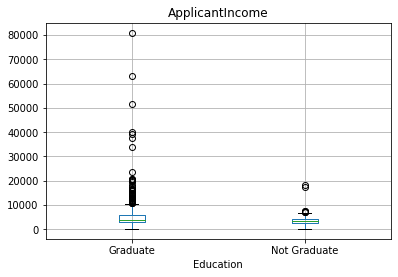

In [ ]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

It can be seen that a very high number of the graduates earn so high which are appearing to be the outlier.

**Now let us analyze the CoapplicantIncome **

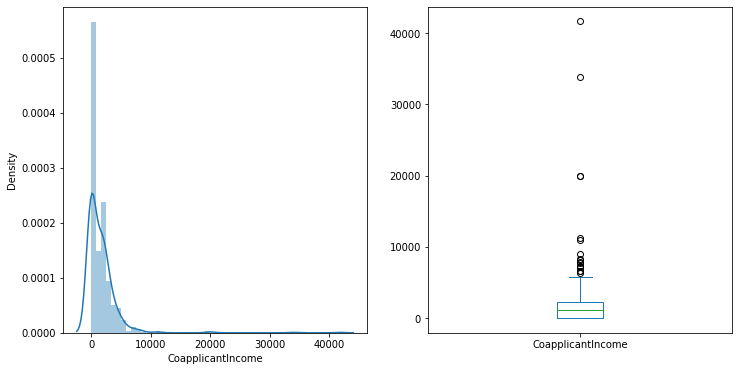

In [ ]:
#Now let us analyze the CoapplicantIncome
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot(kind='box', figsize=(12, 6))

 Just as we saw in the analysis of the ApplicantIncome, there are outliers here too in CoapplicantIncome, so let us see if this disparity is caused by their education

Text(0.5, 0.98, '')

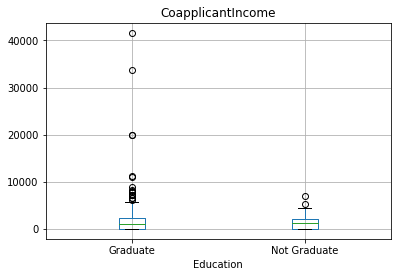

In [ ]:
#Now let us group CoapplicantIncome by Education
train.boxplot(column='CoapplicantIncome', by='Education')
plt.suptitle('')

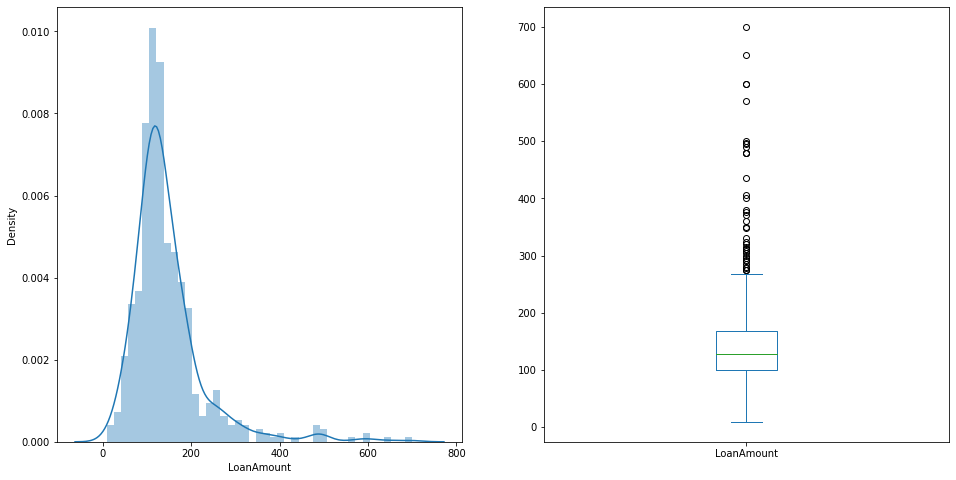

In [ ]:
#Now let us look at the loan amount variable, another numerical variable
plt.subplot(121)
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot(kind='box', figsize=(16,8))

# As we see from the Loan Amount Distibution Plot, that the data distribution is still fairly normal, though it is somewhat still slightly right skewed.

** Now we would analyze the Loan_Amount_Term to see the duration of the loan and which loans took longest time for repayment**

In [ ]:
train['Loan_Amount_Term'].head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [ ]:
train['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

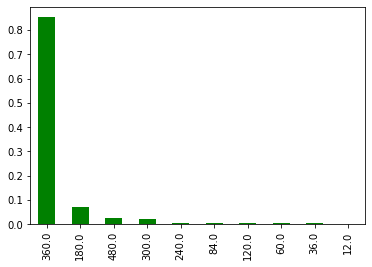

In [ ]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot(kind='bar', color='g')

**From the Loan amount term analysis, it is obvious that most loans took over 360months repayment period which is like 30years.**

**Bivariate Analysis**

Now let us compare Independent columns against the target variable

**Catoegorical Independent Variable VS Target Variable**

### **Gender VS Target Variable(Loan_Status)**

In [ ]:
pd.crosstab(train['Gender'], train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


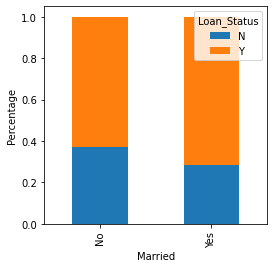

In [ ]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

In [ ]:
pd.crosstab(train['Dependents'],train['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


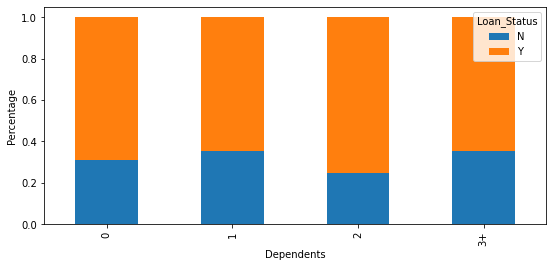

In [ ]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9, 4))
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

In [ ]:
pd.crosstab(train['Education'],train['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


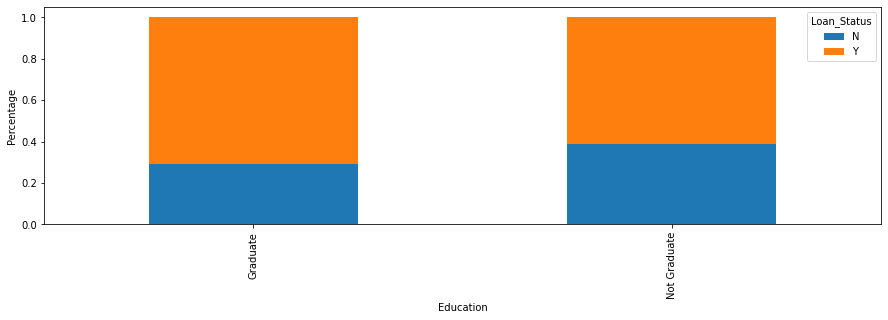

In [ ]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15, 4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

In [ ]:
pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


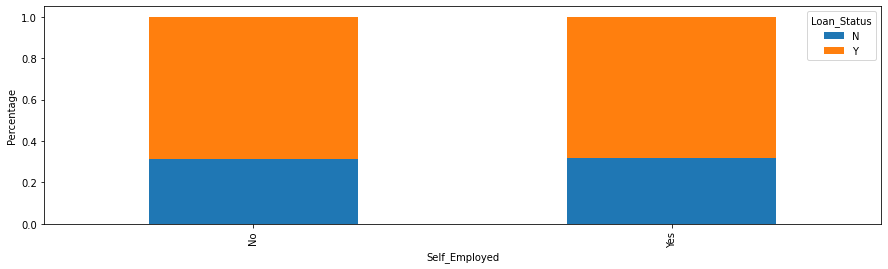

In [ ]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


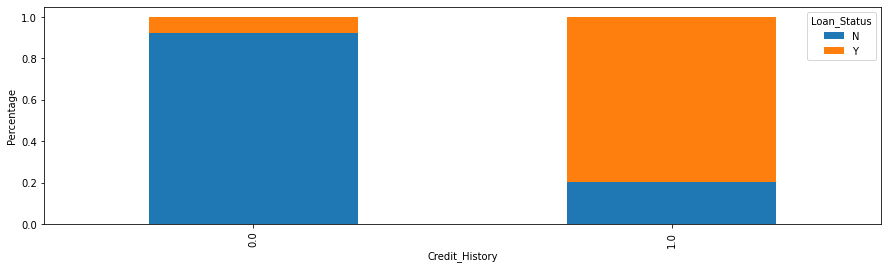

In [ ]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


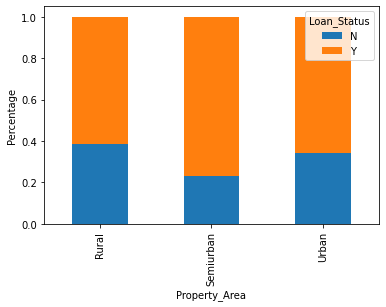

In [ ]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


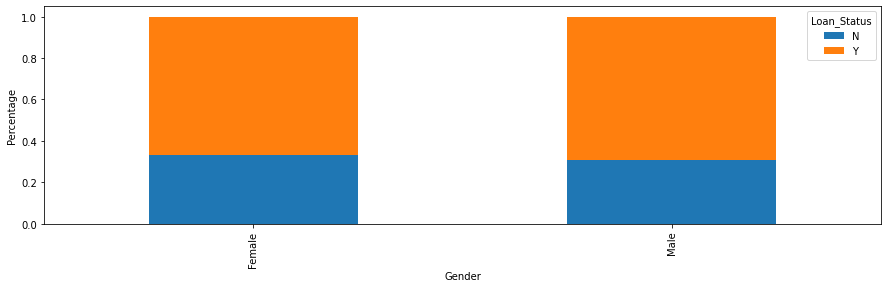

In [ ]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Gender')
P = plt.ylabel('Percentage')

From the bar charts above, it can be inferred that:

proportion of male and female applicants is more or less same for both

*   approved and unapproved loans
*   proportion of married applicants is higher for the approved loans
*   distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
*   there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
*   proportion of loans getting approved for graduates is higher compared to non-graduates
*   it seems people with credit history as 1 are more likely to get their loans approved
*   proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

## **Applicant Income VS Loan_Status**

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


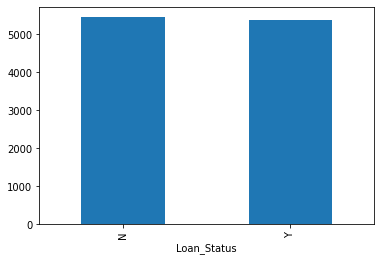

In [ ]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

## **Here the y-axis represents the mean applicant income. We don’t see any significant difference in the mean income between those approval and not approved applicant (5384 vs 5446).

# So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [ ]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

In [ ]:
# take a look at the train set
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


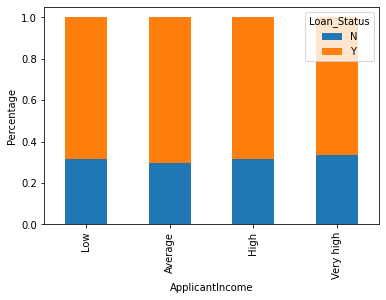

In [ ]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the Coapplicant income and loan amount variable in similar manner.

In [ ]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

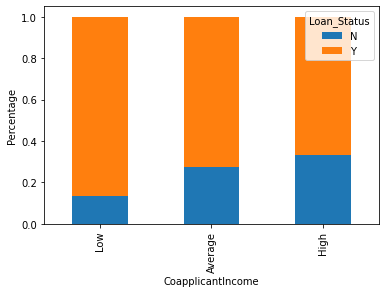

In [ ]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [ ]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.


Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [ ]:
# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [ ]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

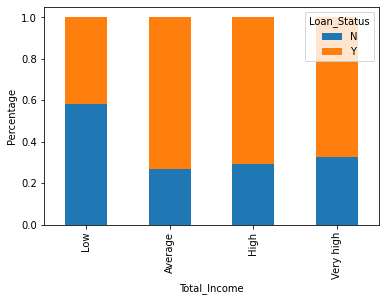

In [ ]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

This is more consistent with our hypothesis with applicants with high income will have more chances of loan approval.

Let’s visualize the Loan amount variable.

In [ ]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)

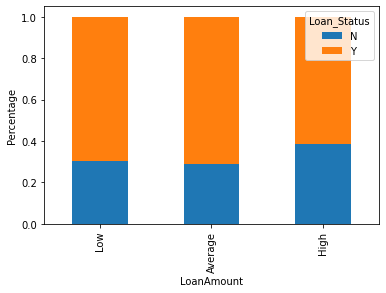

In [ ]:
# plot the chart
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part.

In [ ]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [ ]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [ ]:
# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.

One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [ ]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [ ]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [ ]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient.

Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


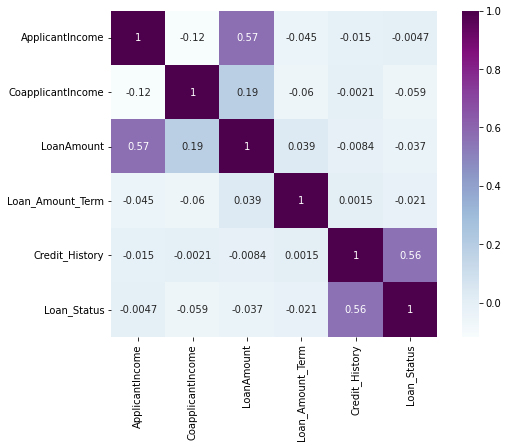

In [ ]:
# calculate and visualize correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

Note: We see that the most correlated variables are

(ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
(Credit_History - Loan_Status) with correlation coefficient of 0.56
LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

## **Data Pre-processing**

Data pre-processing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors.

Data pre-processing is a method of resolving such issues.

Missing value and outlier treatment¶

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

Missing value imputation
Let’s list out feature-wise count of missing values.

In [ ]:
# check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [ ]:
# replace missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term.

We will look at the value count of the Loan amount term variable.

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most.

So we will replace the missing values in this variable using the mode of this variable.

In [ ]:
# replace missing value with the mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [ ]:
# replace missing values with the median value due to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
# check whether all the missing values are filled in the Train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the Train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

Note: We need to replace the missing values in Test set using the mode/median/mean of the Training set, not from the Test set. Likewise, if you remove values above some threshold in the test case, make sure that the threshold is derived from the training and not test set. Make sure to calculate the mean (or any other metrics) only on the train data to avoid data leakage to your test set.

In [ ]:
#let's check if missing values are present in test data
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
# replace missing values in Test set with mode/median from Training set
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
# check whether all the missing values are filled in the Test dataset
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

As we can see that all the missing values have been filled in the Test dataset.

Outlier Treatment
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness (or positive skewness). One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

Text(0.5, 1.0, 'Test')

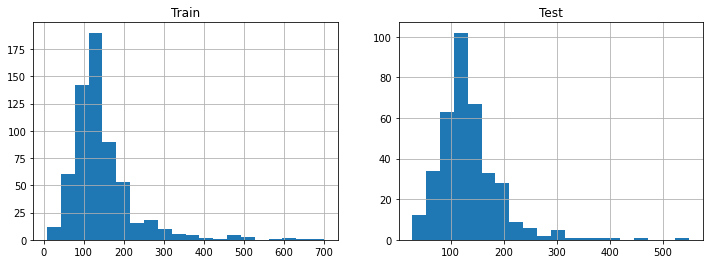

In [ ]:
# before log transformation

ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [ ]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Text(0.5, 1.0, 'Test')

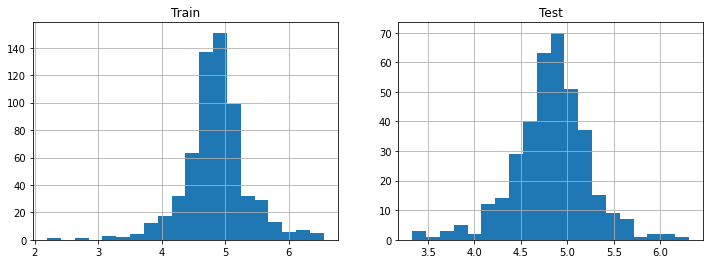

In [ ]:
# after log transformation

ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

## **Model Development and Evaluation**

There are four sub-sections in this stage:

Evaluation Metrics for Classification Problems
Model Building : Part I
Feature Engineering
Model Building : Part II

Evaluation Metrics for Classification Problems¶
The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

Accuracy: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values

True Positive - Targets which are actually true(Y) and we have predicted them true(Y)

True Negative - Targets which are actually false(N) and we have predicted them false(N)

False Positive - Targets which are actually false(N) but we have predicted them true(T)

False Negative - Targets which are actually true(T) but we have predicted them false(N)

---



Using these values, we can calculate the accuracy of the model. The accuracy is given by:

Accuracy = (TP+TN) / (TP+TN+FP+FN)

Precision: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.

Precision = TP / (TP + FP)

Recall (Sensitivity) - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. E.g. Proportion of patients with a disease who test positive.

Recall = TP / (TP + FN)

Specificity - It is a measure of how many observations of false class are labeled correctly. E.g. Proportion of patients without the disease who test negative.

Specificity = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

ROC curve

Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (Sensitivity) and false positive rate (1- Specificity).

The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.

So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.

We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.

For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.

The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1 model as the AUC is more for those classes.

## **Model Building : Part I¶**

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function


Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [ ]:
# drop Loan_ID
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [ ]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.
As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.

Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

We can use pandas get_dummies function to convert categorical variable into dummy/indicator variables, it will only convert "object" type and will not affect numerical type.

In [ ]:
# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
X.shape, train.shape, test.shape

((614, 21), (614, 22), (367, 21))

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

**Logistics Regression**

In [ ]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Here the C=1.0 parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [ ]:
# make prediction
pred_cv = model.predict(x_cv)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.827027027027027

So our predictions are over 83% accurate, i.e. we have identified 83% of the loan status correctly.

Let’s evaluate our model with the confusion matrix.

[[ 23  28]
 [  4 130]]


Text(33.0, 0.5, 'True')

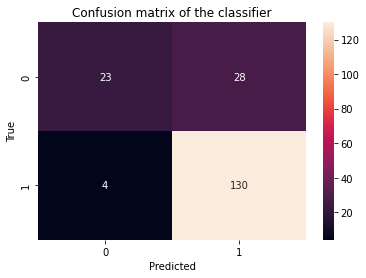

In [ ]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

Let's build a text report showing the main classification metrics.

In [ ]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        51
           1       0.82      0.97      0.89       134

    accuracy                           0.83       185
   macro avg       0.84      0.71      0.74       185
weighted avg       0.83      0.83      0.81       185



The performance of our model seems encouraging, with accuracy of 83%, precision of 82% and recall of 99%.

Let’s make predictions for the test dataset and submit the result.

In [ ]:
# make prediction on test set
pred_test = model.predict(test)

In [ ]:
# take a look at the prediction
pred_test[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

Lets import the submission file which we have to submit on the solution checker.

In [ ]:
Uploaded = files.upload()

Saving Sample_Submission.csv to Sample_Submission.csv


In [ ]:
submission = pd.read_csv(io.BytesIO(Uploaded['Sample_Submission.csv']))

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

In [ ]:
#The submission dataset for now only contains the empty columns of Loan_ID and Loan_Status
submission.head()

,Loan_ID,Loan_Status


In [ ]:
# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [ ]:
# replace with "N" and "Y"
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
# take a look at the submission result
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
# convert to CSV file, without row index
#connerting to csv in jupyter notebook
#submission.to_csv('logistic.csv', index=False)

In [ ]:
submission.to_csv('logistic.csv')
from google.colab import files
files.download("logistic.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Instead of creating validation set, we can also make use of cross validation to validate our predictions.

Logistic Regression using stratified k-folds cross validation
To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

The validation set approach
k-fold cross validation
Leave one out cross validation (LOOCV)
Stratified k-fold cross validation

In this section we will learn about stratified k-fold cross validation. Let us understand how it works:

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
It is generally a better approach when dealing with both bias and variance.
A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.
If K=N, then it is called Leave one out cross validation, where N is the number of observations.

Below is the visualization of a stratified k-fold validation when k=5.



In [ ]:
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset. The folds are made by preserving the percentage of samples for each class. In stratified k-fold, each fold contains roughly the same proportions of the different types of class labels.

*Note: * Previously, we use train_test_split to split the data, in this example we will use StratifiedKFold to split the data, the final accuracy score might be slightly differently

In [ ]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.8012928162068507


In [ ]:
"""
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    print('accuracy_score', score)
    i+=1
"""

"\ni = 1\nkf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)\n\nfor train_index, test_index in kf.split(X, y):\n    print('\n{} of kfold {}'.format(i, kf.n_splits))\n    X_train, X_test = X.loc[train_index], X.loc[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n  \n    model = LogisticRegression(random_state=1)\n    model.fit(X_train, y_train)\n    pred_test = model.predict(X_test)\n    score = accuracy_score(y_test, pred_test)\n    print('accuracy_score', score)\n    i+=1\n"

The mean validation accuracy for this model turns out to be 0.81. Let us visualize the ROC curve.

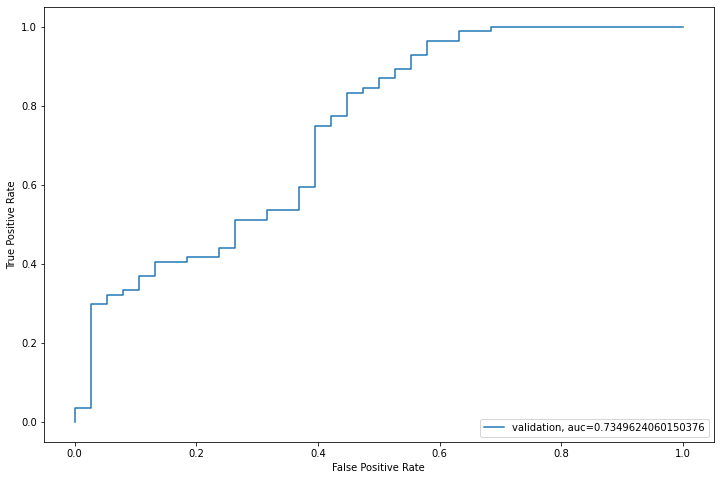

In [ ]:
# visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We got an AUC ("Area Under Curve") value of 0.77.

In [ ]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
submission.to_csv('logistic1.csv')
from google.colab import files
files.download("logistic1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Feature Engineering**
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

Equated Monthly Installment - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [ ]:
# combine Applicant Income and Coapplicant Income into a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

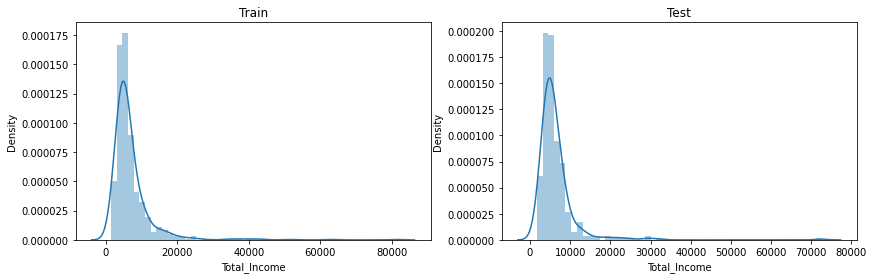

In [ ]:
# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])

ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

In [ ]:
# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Text(0.5, 1.0, 'Test')

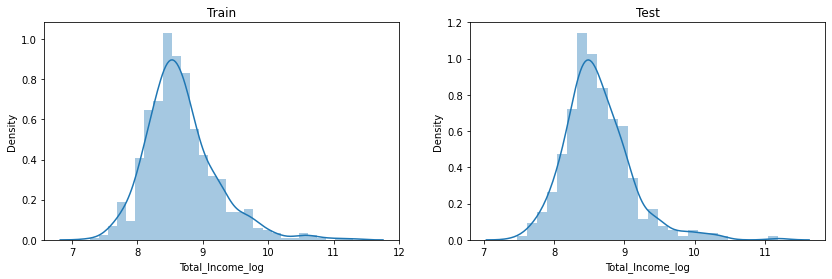

In [ ]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term. It is just an approximation of actual EMI.

In [ ]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']


Let’s check the distribution of EMI variable. EMI is a continuous numerical variable.

Text(0.5, 1.0, 'Test')

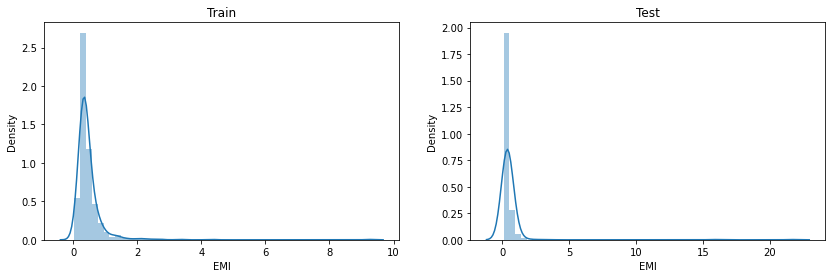

In [ ]:
# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

Let us create Balance Income feature now and check its distribution. This is the income left after the EMI has been paid.

In [ ]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

Text(0.5, 1.0, 'Test')

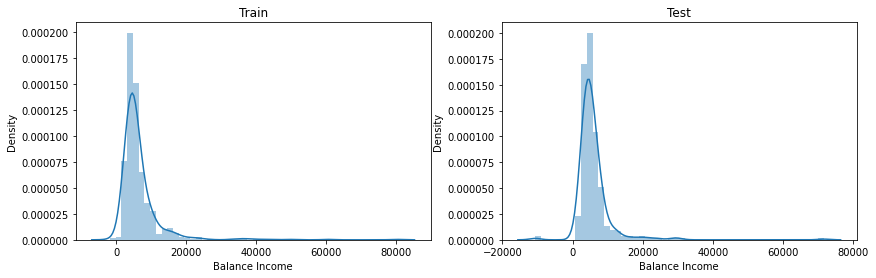

In [ ]:
# check the distribution of EMI
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too. We will drop "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term" as they are already represented by "Total Income", "EMI" and "Balance Income".

In [ ]:
# before dropping variables
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [ ]:
# drop the variables
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [ ]:
# after dropping variables
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


# **Model Building : Part II**

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.



1.   Logistic Regression
2.   Decision Tree
3.   Random Forest
4.   XGBoost


Let’s prepare the data for feeding into the models.

In [ ]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status                # Save target variable in separate dataset

## **Logistic Regression**

In [ ]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.680327868852459

Mean validation accuracy:  0.7246834599493536


In [ ]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID']

In [ ]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
# Converting submission file to .csv format
submission.to_csv('Log2.csv', index=False)

In [ ]:
submission.to_csv('Log2.csv')
from google.colab import files
files.download("Log2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Decision Tree**

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.


Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [ ]:
# import library
from sklearn import tree

Let’s fit the decision tree model with 5 folds of cross validation.

In [ ]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836

Mean validation accuracy:  0.7149140343862455


The mean validation accuracy for this model is 0.71, which is lower than Logistic Regression.

In [ ]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID']

In [ ]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
submission.to_csv('Decision Tree.csv')
from google.colab import files
files.download("Decision Tree.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We got an accuracy of 0.6458 which is much lesser than the accuracy from logistic regression model. So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

Random Forest

RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
Final prediction can be a function of all the predictions made by the individual learners.
In case of regression problem, the final prediction can be mean of all the predictions.
There are some parameters worth exploring with the sklearn RandomForestClassifier:

n_estimators
max_features
n_estimators = ususally bigger the forest the better, there is small chance of overfitting here. The more estimators you give it, the better it will do. We will use the default value of 10.

max depth of each tree (default none, leading to full tree) - reduction of the maximum depth helps fighting with overfitting. We will limit at 10.

In [ ]:
# import library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8373983739837398

2 of kfold 5
accuracy_score 0.7723577235772358

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7540983606557377

Mean validation accuracy:  0.7849660135945622


# **GridSearchCV**

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. GridSearch is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will use GridSearchCV in sklearn.model_selection for an exhaustive search over specified parameter values for an estimator. GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.


In [ ]:
# import library
from sklearn.model_selection import GridSearchCV

In [ ]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [ ]:
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [ ]:
# fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

After the grid search model has been fit, we can use use best_estimator_ to obtain the estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

In [ ]:
# estimate the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 141. Now let’s build the model using these optimized values.

In [ ]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.8110489137678263


The mean validation accuracy has improved from 0.783 to 0.813

In [ ]:
# filling Loan_Status with predictions
submission['Loan_Status']=pred_test

# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
submission.to_csv('Random Forest.csv')
from google.colab import files
files.download("Random Forest.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Feature Importance¶**

Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so. It will return the feature importances (the higher, the more important the feature).

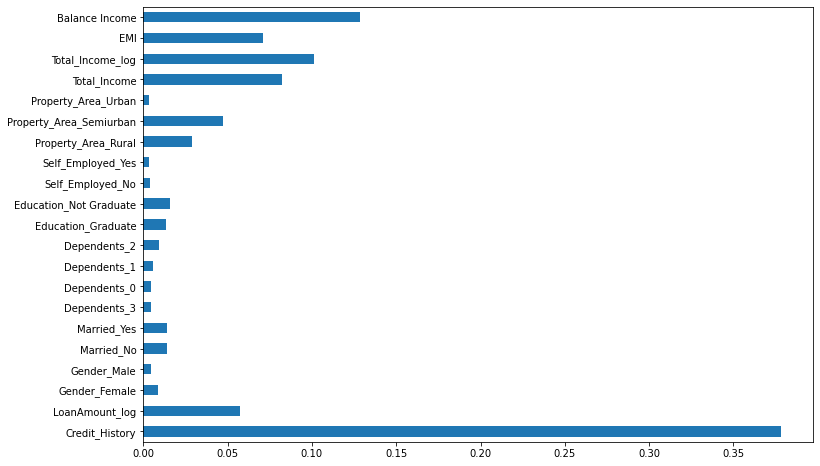

In [ ]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Total Income Log, Total Income, Balance Income, Property Area Suburban, EMI. So, feature engineering helped us in predicting our target variable.

# **XGBoost**

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. It’s a boosting algorithm

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

n_estimator: This specifies the number of trees for the model.
max_depth: We can specify maximum depth of a tree using this parameter.

In [ ]:
# import library
from xgboost import XGBClassifier

In [ ]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred3=model.predict_proba(test)[:,1]

# warnings.filterwarnings(action='ignore', category=DeprecationWarning)


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7786885245901639

Mean validation accuracy:  0.7963881114220979


The mean validation accuracy for this model is 0.78

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters.

In [ ]:
# import library
from sklearn.model_selection import GridSearchCV

In [ ]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [ ]:
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(XGBClassifier(random_state=1), paramgrid)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [ ]:
# fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [ ]:
# estimate the optimized value
grid_search.best_estimator_

XGBClassifier(max_depth=1, n_estimators=81, random_state=1)

So, the optimized value for the max_depth variable is 1 and for n_estimator is 81. Now let’s build the model using these optimized values.

In [ ]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = XGBClassifier(random_state=1, n_estimators=81, max_depth=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.806157536985206


In [ ]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test

# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
# Converting submission file to .csv format
submission.to_csv('XGBoost.csv')
from google.colab import files
files.download("XGBoost.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **In Conclusion**

After trying and testing 4 different algorithms, the best accuracy on the public leaderboard is achieved by Logistic Regression (0.7847), followed by RandomForest (0.7778) and XGBoost (0.7778), and Decision Tree performed the worst (0.6458). While new features created via feature engineering helped in predicting the target variable, it did not improve the overall model accuracy much. Compared to using default parameter values, GridSearchCV helped improved the model's mean validation accuracy by providing the optimized values for the model's hyperparameters. On the whole, a logistic regression classifier provides the best result in terms of accuracy for the given dataset, without any feature engineering needed. Because of its simplicity and the fact that it can be implemented relatively easy and quick, Logistic Regression is often a good baseline that data scientists can use to measure the performance of other more complex algorithms. In this case, however, a basic Logistic Regression has already outperformed other more complex algorithms like Random Forest and XGBoost, for the given dataset.